In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print((x_train, y_train), (x_test, y_test))

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
print(x_train)
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])


C:\Users\vatch\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
print(history)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8798 - loss: 0.4246 - val_accuracy: 0.9608 - val_loss: 0.1380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9661 - loss: 0.1169 - val_accuracy: 0.9685 - val_loss: 0.0985
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9775 - loss: 0.0796 - val_accuracy: 0.9748 - val_loss: 0.0832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0561 - val_accuracy: 0.9720 - val_loss: 0.0832
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0415 - val_accuracy: 0.9770 - val_loss: 0.0731


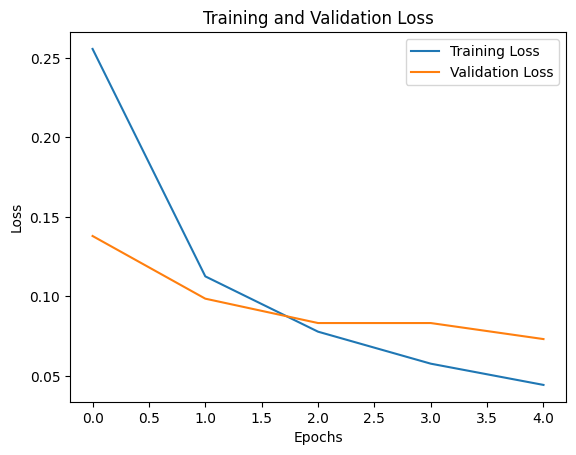

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(x_test)
print("y_pred:",y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
y_pred: [[9.9176305e-07 1.0058177e-07 1.7417615e-05 ... 9.9963999e-01
  5.5128730e-06 1.8316125e-05]
 [8.7633356e-07 3.7008531e-06 9.9998689e-01 ... 4.1581552e-12
  3.5418699e-07 2.8480378e-13]
 [3.4661232e-05 9.9814427e-01 4.9541640e-04 ... 7.2855304e-04
  4.9986807e-04 1.2792016e-06]
 ...
 [7.0586240e-13 2.5576643e-09 3.3899474e-11 ... 2.4794424e-08
  5.7136810e-07 5.5936329e-07]
 [3.7060964e-08 9.6305692e-09 3.0639186e-11 ... 4.8969133e-07
  4.5994681e-04 1.7865931e-10]
 [1.0297244e-08 8.1022016e-09 3.5982293e-07 ... 3.6168948e-12
  6.9516648e-10 3.0677092e-09]]


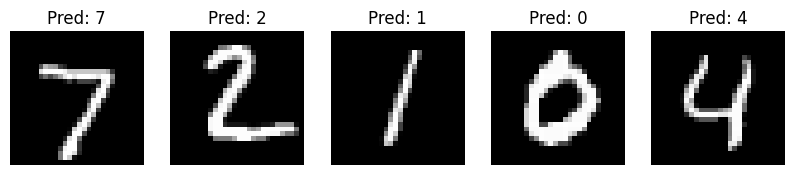

In [14]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {tf.argmax(y_pred[i]).numpy()}')
    plt.axis('off')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 0s - 2ms/step - accuracy: 0.9770 - loss: 0.0731
Test accuracy: 0.9769999980926514
